# CPI Optimization

## Goal

We define a combined goal function $f$ to determine the best parameters for our CPI model.

** I) max. $f = 0.45 * CTR_{normalized} + 0.45 * MAP + 0.05 * TopRecs + 0.05 * DistinctRecs$ **

** II) get rid of \alpha parameter **

- f is normalized, i.e. theoretical optimum = 1
- All evaluations are performed with **topK=3**

- x: CPI score (with alpha) = proximity^-alpha for recommendation pair
- y: number of in links of recommended article
- z: total number article in test collection

- MAP: Mean Average Precision (from See also evaluation)
- CTR_normalized (from click stream evaluation)
    - CTR: clicks on all recommended articles
    - CTR_normalized = CTR / top-k clicked articles | best score = 1
- TopRecs: how often is the most recommended article recommended (measure of coverage)
    - Optimum value: 1 | most recommended article is only one time recommended
    - $TopRecs = 1/count$
- DistinctRecs: (measure of coverage)

## Proximity

- Words – Number of words between two links
- Relative words – Number of words between two links divided by the total number of words the linking article contains
- Structure – Distance based on text structure elements (sentence ½, paragraph ¼, subsection 1/8, section 1/16, article 1/20)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from tabulate import tabulate
import pandas as pd


In [2]:
# Load CPI values (simplewiki)
# cpis = np.loadtxt('cpi_sample_0_1', delimiter='\n')  # 10% sample - 270MB
cpis = np.loadtxt('cpi_sample_0_01', delimiter='\n')  # 1% sample - 27MB

cpis_log = np.log(cpis)

In [3]:
print('1st element: %f' % cpis[0])
print('Mean: %f\nMin: %f\nMax: %f\nCount: %i' % (np.mean(cpis), np.min(cpis), np.max(cpis), len(cpis)))


1st element: 0.017200
Mean: 0.021607
Min: 0.000100
Max: 1032.410400
Count: 4135774


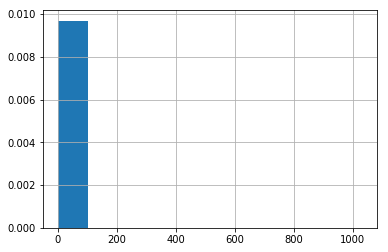

In [4]:

n, bins, patches = plt.hist(cpis, 10, normed=True)

#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

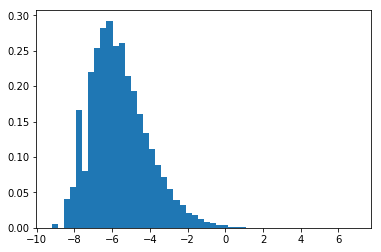

In [5]:
plt.hist(cpis_log, 50, normed=True)
plt.show()

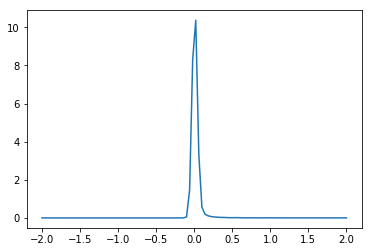

In [6]:
density = gaussian_kde(cpis)
xs = np.linspace(-2,2,100)
#density.covariance_factor = lambda : .5
#density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

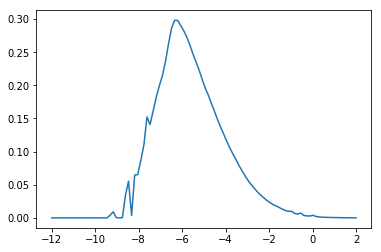

In [7]:
density = gaussian_kde(cpis_log)
xs = np.linspace(-12,2,100)
#density.covariance_factor = lambda : .5
#density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

In [8]:
# Include output for each Flink run here


In [9]:
# Final runs
runs = [
      {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.9,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 153309236,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1175.477717485352,
    "map": 1237.395097001262,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 920,
    "distinct_rec_count": 56708
  },
  {
    "equation": "classic",
    "proximity": "abs",
    "alpha": 0.9,
    "recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 175766982,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1284.6717278996268,
    "map": 1354.3554650393933,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 874,
    "distinct_rec_count": 64111
  },
  {
    "equation": "smooth",
    "proximity": "abs",
    "alpha": 0.9,
    "recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 175697760,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1284.6161723440705,
    "map": 1354.2999094838378,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 875,
    "distinct_rec_count": 64090
  },
  {
    "equation": "probalistic",
    "proximity": "abs",
    "alpha": 0.9,
    "recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 175840048,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1285.3106167885157,
    "map": 1355.0499094838376,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 874,
    "distinct_rec_count": 64127
  },
  {
    "equation": "bm25",
    "proximity": "abs",
    "alpha": 0.9,
    "recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 175890196,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1284.3565473829751,
    "map": 1353.9447818772396,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 873,
    "distinct_rec_count": 64339
  }
]

runs_de = [
      {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.9,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 499838333,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8949.025996837456,
    "map": 9426.370524822765,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1610,
    "distinct_rec_count": 606474
  },
  {
    "equation": "classic",
    "proximity": "abs",
    "alpha": 0.9,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 539973705,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 9671.94182764293,
    "map": 10213.317814389891,
    "article_count": 702542,
    "top_rec_title": "Kalifornien",
    "top_rec_count": 423,
    "distinct_rec_count": 702468
  },
  {
    "equation": "smooth",
    "proximity": "abs",
    "alpha": 0.9,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 539951239,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 9671.144208595304,
    "map": 10212.520195342273,
    "article_count": 702542,
    "top_rec_title": "Kalifornien",
    "top_rec_count": 424,
    "distinct_rec_count": 702425
  },
  {
    "equation": "probalistic",
    "proximity": "abs",
    "alpha": 0.9,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 540034679,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 9671.523772087374,
    "map": 10212.899758834335,
    "article_count": 702542,
    "top_rec_title": "Kalifornien",
    "top_rec_count": 423,
    "distinct_rec_count": 702515
  },
  {
    "equation": "bm25",
    "proximity": "abs",
    "alpha": 0.9,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 539963454,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 9672.883037359134,
    "map": 10214.484036131107,
    "article_count": 702542,
    "top_rec_title": "Kalifornien",
    "top_rec_count": 423,
    "distinct_rec_count": 703979
  }
]

In [13]:
# See CPI_alpha
simplewiki_sa_count = 6173 + 53 + 23178
dewiki_sa_count = 4106 + 5072 + 157171

# Print runs
# ALTERNATIVE: Convert to LaTeX
# https://techoverflow.net/2013/12/08/converting-a-pandas-dataframe-to-a-customized-latex-tabular/

def get_eval_df(data, seealso_count):
    df = pd.DataFrame(data)
        
    # Set label (without eq)
    df['label'] = df.apply(lambda r: '%s' % (r['equation']), axis=1)

    # Compute MAP
    df['avg_map'] = df.apply(lambda r: r['map'] / seealso_count, axis=1)
    
    # Compute CTR
    df['ctr'] = df['top_k_clicks'] / df['opt_clicks']

    # Compute goal function
    df['f'] = df.apply(lambda r: 0.45 * r['ctr'] + 0.45 * r['avg_map'] + 0.05 * (1/r['top_rec_count']) + 0.05 * (r['distinct_rec_count']/r['article_count']), axis=1)

    # Find best run
    df['f_max'] = df.apply(lambda r: r['f'] == np.max(df['f']), axis=1)
        
    return df
    
def validate_eval_df(df):
    # Validation: All these fields need to be equal
    for field in ['sa_recs_count','opt_clicks', 'seealso_count']:
        assert len(df) == len(df[df[field] == df[field][0]])
    
def print_eval_table(df, cols=['equation','proximity','alpha','ctr','avg_map','top_rec_count', 'distinct_rec_count', 'f', 'f_max']):
    print(tabulate(df[cols], headers='keys'))
    
    
    
df_simple = get_eval_df(runs, simplewiki_sa_count)

print('## simplewiki\n')
print_eval_table(df_simple)


df_de = get_eval_df(runs_de, dewiki_sa_count)

print('\n\n## dewiki\n')
print_eval_table(df_de)

validate_eval_df(df_simple)
validate_eval_df(df_de)



## simplewiki

    equation     proximity      alpha       ctr    avg_map    top_rec_count    distinct_rec_count         f  f_max
--  -----------  -----------  -------  --------  ---------  ---------------  --------------------  --------  -------
 0  x            abs              0.9  0.223552  0.0420825              920                 56708  0.119536  False
 1  classic      abs              0.9  0.256299  0.0460602              874                 64111  0.136062  False
 2  smooth       abs              0.9  0.256198  0.0460584              875                 64090  0.136016  False
 3  probalistic  abs              0.9  0.256406  0.0460839              874                 64127  0.13612   False
 4  bm25         abs              0.9  0.256479  0.0460463              873                 64339  0.136136  True


## dewiki

    equation     proximity      alpha       ctr    avg_map    top_rec_count    distinct_rec_count         f  f_max
--  -----------  -----------  -------  --------  --

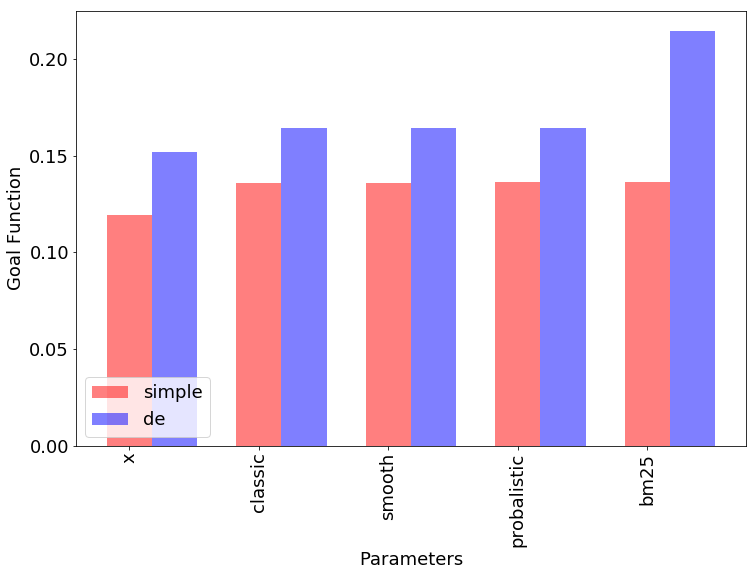

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams['font.size'] = 18

def df_plot(dfs, labels, colors):
    width = 0.35
    fig, ax = plt.subplots()
    
    for key, df in enumerate(dfs):
        ax.bar(df.index + key * width, df['f'], width, color=colors[key], alpha=.5, label=labels[key])
    
    ax.set_xlabel("Parameters")
    ax.set_ylabel("Goal Function") 
    ax.set_xticklabels(dfs[0]['label'], rotation='vertical')
    ax.set_xticks(np.arange(len( dfs[0]['f'])))

    ax.legend(loc='lower left')
    plt.show()
                             
df_plot([df_simple, df_de], ['simple', 'de'], ['r', 'b'])                             

## Flink Jobs

Use the following commands to generate clickstream evaluation output (with simplewiki):

```
export RUN="00"

# With CPI expression + top recommendations
$FLINK_HOME/bin/flink run -c org.wikipedia.citolytics.clickstream.ClickStreamEvaluation -p $PARALLELISM $JAR \
    --wikisim $OUTPUT_DIR/wikisim_raw \
    --gold $CLICKSTREAMS_PATH \
    --topk 3 \
    --id-title-mapping $ENWIKI_IDTITLE_MAPPING \
    --langlinks $ENWIKI_LANGLINKS \
    --lang simple \
    --summary \
    --top-recommendations $OUTPUT_DIR/top_$RUN \
    --output $OUTPUT_DIR/cs_cpi_$RUN

# See cpi_optimization.sh for all job parameters
    
```

Extract Flink output and rewrite to Python array:

```

hdfs dfs -cat $OUTPUT_DIR/cs_cpi_$RUN | awk -F'|' '{print "{\"equation\": \"\", \"proximity\": \"\", \"alpha\": 0, \"recs_count\": "$3", \"impressions\": "$4", \"total_clicks\": "$5", \"top_k_clicks\": "$6", \"opt_clicks\": "$9""}'

hdfs dfs -cat $OUTPUT_DIR/top_$RUN | sed ':a;N;$!ba;s/\n/|/g' | awk -F'|' '{print ", \"article_count\": "$2", \"top_rec_title\":\""$3"\", \"top_rec_count\": "$4", \"distinct_rec_count\":"$6"}"}'
```

#### Runtimes

- Simplewiki + Langlinks + Without CPI expression (stats): 2 min

## Gold standard: ClickStreams

The following data sets are used for the evaluation. A download is available at [datahub.io](https://datahub.io/dataset/wikipedia-clickstream).

- 2015_02_en_clickstream.tsv
- 2016_02_en_clickstream.tsv
- 2016_03_en_clickstream.tsv
- 2016_04_en_clickstream.tsv
- 2016_08_en_clickstream.tsv
- 2016_09_en_clickstream.tsv
- 2017_01_en_clickstream.tsv


In [ ]:
# Backup


# TODO See also evaluation -> MAP score
# Article count = Article for that CS data exist

# runs II
runs = [
    {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1,
    "recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 233259699,
    "top_k_clicks": 23452971,
    "opt_clicks": 112242942,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 897,
    "distinct_rec_count": 57354
  },
  {
    "equation": "classic",
    "proximity": "abs",
    "alpha": 1,
    "recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 232086802,
    "top_k_clicks": 25212897,
    "opt_clicks": 111190975,
    "article_count": 87058,
    "top_rec_title": "Footballer",
    "top_rec_count": 1607,
    "distinct_rec_count": 60515
  },
  {
    "equation": "smooth",
    "proximity": "abs",
    "alpha": 1,
    "recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 233538020,
    "top_k_clicks": 26041126,
    "opt_clicks": 112689808,
    "article_count": 87058,
    "top_rec_title": "Footballer",
    "top_rec_count": 1607,
    "distinct_rec_count": 60515
  },
  {
    "equation": "probalistic",
    "proximity": "abs",
    "alpha": 1,
    "recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 231182977,
    "top_k_clicks": 25408556,
    "opt_clicks": 110272751,
    "article_count": 87058,
    "top_rec_title": "Footballer",
    "top_rec_count": 1607,
    "distinct_rec_count": 60515
  },
  {
    "equation": "bm25",
    "proximity": "abs",
    "alpha": 1,
    "recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 233350474,
    "top_k_clicks": 25573181,
    "opt_clicks": 112322989,
    "article_count": 87058,
    "top_rec_title": "Footballer",
    "top_rec_count": 1607,
    "distinct_rec_count": 60515
  }
]

runs_de = [
  {
    "equation": "classic",
    "proximity": "abs",
    "alpha": 1,
    "recs_count": 113863,
    "impressions": 723199971,
    "total_clicks": 119770964,
    "top_k_clicks": 10774061,
    "opt_clicks": 60116976,
    "article_count": 37993,
    "top_rec_title": "FC Bayern M<C3><BC>nchen",
    "top_rec_count": 209,
    "distinct_rec_count": 59028
  },
  {
    "equation": "smooth",
    "proximity": "abs",
    "alpha": 1,
    "recs_count": 113863,
    "impressions": 723199971,
    "total_clicks": 119545402,
    "top_k_clicks": 10751393,
    "opt_clicks": 60138217,
    "article_count": 37993,
    "top_rec_title": "FC Bayern M<C3><BC>nchen",
    "top_rec_count": 209,
    "distinct_rec_count": 59028
  },
  {
    "equation": "probalistic",
    "proximity": "abs",
    "alpha": 1,
    "recs_count": 113863,
    "impressions": 723199971,
    "total_clicks": 119982299,
    "top_k_clicks": 10795516,
    "opt_clicks": 60224296,
    "article_count": 37993,
    "top_rec_title": "FC Bayern M<C3><BC>nchen",
    "top_rec_count": 209,
    "distinct_rec_count": 59028
  },
  {
    "equation": "bm25",
    "proximity": "abs",
    "alpha": 1,
    "recs_count": 113863,
    "impressions": 723199971,
    "total_clicks": 120722987,
    "top_k_clicks": 11128359,
    "opt_clicks": 61271871,
    "article_count": 37993,
    "top_rec_title": "FC Bayern M<C3><BC>nchen",
    "top_rec_count": 209,
    "distinct_rec_count": 59028
  }
]

runs = [
    {
    "equation": "x",
    "proximity": "words",
    "alpha": 0.5,
    "recs_count": 260349, "impressions": 1380497539, "total_clicks": 232100294, "top_k_clicks": 2175289, "opt_clicks": 111249598
    , "article_count": 87058, "top_rec_title":"ER (TV series)", "top_rec_count": 1620, "distinct_rec_count":42885
    
  },
  {
    "equation": "x*log(z/(y+1)",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 235085870,
    "top_k_clicks": 26708916,
    "opt_clicks": 113256642,
    "article_count": 87958,
    "top_rec_title": "2014",
    "top_rec_count": 884,
    "distinct_rec_count": 67623
  },
  {
    "equation": "x*log((z-y)/(y+1))",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 232987482,
    "top_k_clicks": 26646898,
    "opt_clicks": 111615184,
    "article_count": 87958,
    "top_rec_title": "2014",
    "top_rec_count": 884,
    "distinct_rec_count": 67640
  },
  {
    "equation": "(1+log(x))*log(z/(y+1)",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 233412503,
    "top_k_clicks": 24075166,
    "opt_clicks": 112140343,
    "article_count": 87958,
    "top_rec_title": "2014",
    "top_rec_count": 889,
    "distinct_rec_count": 103916
  },
  {
    "equation": "(1+log(x))/sqrt(y+1)",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 234303821,
    "top_k_clicks": 5479381,
    "opt_clicks": 112799793,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 471,
    "distinct_rec_count": 145594
  },
  {
    "equation": "x/sqrt(y+1)",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 233322353,
    "top_k_clicks": 9892236,
    "opt_clicks": 111789665,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 423,
    "distinct_rec_count": 154995
  },
  {
    "equation": "x/sqrt(y+1)",
    "proximity": "relative",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 233033256,
    "top_k_clicks": 7541501,
    "opt_clicks": 111733256,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 479,
    "distinct_rec_count": 152798
  },
  {
    "equation": "x",
    "proximity": "relative",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 232933071,
    "top_k_clicks": 17039137,
    "opt_clicks": 111413126,
    "article_count": 87958,
    "top_rec_title": "Americans",
    "top_rec_count": 1165,
    "distinct_rec_count": 95450
  },
  {
    "equation": "(1+log(x))/sqrt(y+1)",
    "proximity": "relative",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 233067901,
    "top_k_clicks": 399003,
    "opt_clicks": 111730040,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 536,
    "distinct_rec_count": 135850
  },
  {
    "equation": "x/log(y+2)",
    "proximity": "relative",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 232366764,
    "top_k_clicks": 11586104,
    "opt_clicks": 111222858,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 366,
    "distinct_rec_count": 143645
  },
  {
    "equation": "x/(1+log(y+1))",
    "proximity": "relative",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 233926433,
    "top_k_clicks": 9101762,
    "opt_clicks": 112385308,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 417,
    "distinct_rec_count": 144301
  }
]

